In [91]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [92]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("cms/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 34.05it/s]


View Calltree

In [93]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

34.721 main
├─ 5.093 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Initialized
├─ 27.446 comm
│  ├─ 0.876 comm_large
│  │  ├─ 0.081 MPI_Allreduce
│  │  ├─ 0.004 MPI_Gather
│  │  └─ 0.734 MPI_Scatterv
│  └─ 26.571 comm_small
│     └─ 26.570 MPI_Reduce
├─ 1.666 comp
│  ├─ 30.851 comp_large
│  └─ 0.702 comp_small
├─ 1.833 correctness_check
└─ 0.442 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 34.72 indices: {'profile': 120461478})
█ 31.25 - 34.72
█ 24.30 - 31.25
█ 17.36 - 24.30
█ 10.42 - 17.36
█ 3.47 - 10.42
█ 0.00 - 3.47

name User code    ◀  Only in left graph    ▶  Only in right graph



In [94]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cache_misses,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,array_size,array_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120461478,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a134217728-tSorted.cali,true,true,true,true,1730132930,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Sorted]",c,radix,mpi,int,4,134217728,Sorted,32,strong,2,online
337470734,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a134217728-tSorted.cali,true,true,true,true,1730132901,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Sorted]",c,radix,mpi,int,4,134217728,Sorted,16,strong,2,online
709469328,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a268435456-tRandom.cali,true,true,true,true,1730132777,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 268435456, Random]",c,radix,mpi,int,4,268435456,Random,16,strong,2,online
1408102941,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a134217728-tRandom.cali,true,true,true,true,1730132930,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Random]",c,radix,mpi,int,4,134217728,Random,32,strong,2,online
1662698885,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a134217728-tReverse.cali,true,true,true,true,1730132937,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Reverse]",c,radix,mpi,int,4,134217728,Reverse,32,strong,2,online
1768039795,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a134217728-tReverse.cali,true,true,true,true,1730132870,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Reverse]",c,radix,mpi,int,4,134217728,Reverse,16,strong,2,online
2322322292,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a268435456-tSorted.cali,true,true,true,true,1730135982,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 268435456, Sorted]",c,radix,mpi,int,4,268435456,Sorted,32,strong,2,online
2604237036,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a268435456-tReverse.cali,true,true,true,true,1730135982,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 268435456, Reverse]",c,radix,mpi,int,4,268435456,Reverse,32,strong,2,online
3090939849,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a134217728-tRandom.cali,true,true,true,true,1730132898,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./radix_sort_mpi, 134217728, Random]",c,radix,mpi,int,4,134217728,Random,16,strong,2,online


Group Performance data by `matrix_size` in the Thicket metadata table.

In [95]:
tk.metadata_column_to_perfdata("num_procs", overwrite=True)
tk.metadata_column_to_perfdata("array_size", overwrite=True)
tk.metadata_column_to_perfdata("array_type", overwrite=True)

# tk.dataframe = tk.dataframe.reset_index().set_index(
#     ["node", "num_procs", "matrix_size"]
# ).sort_index()

tk.dataframe = tk.dataframe.reset_index().set_index(
    ["node", "num_procs", "array_size", "array_type"]
).sort_index()

tk.dataframe.head()
# print(tk.dataframe['comm'].head(100))

profile  \
node                                 num_procs array_size array_type               
{'name': 'main', 'type': 'function'} 16        134217728  Random      3090939849   
                                                          Reverse     1768039795   
                                                          Sorted       337470734   
                                               268435456  Random       709469328   
                                                          Reverse     4170448231   

                                                                      nid  \
node                                 num_procs array_size array_type        
{'name': 'main', 'type': 'function'} 16        134217728  Random      1.0   
                                                          Reverse     1.0   
                                                          Sorted      1.0   
                                               268435456  Random      1.0   
                                                          Reverse     1.0   

                                                                       spot.channel  \
node                                 num_procs array_size array_type                  
{'name': 'main', 'type': 'function'} 16        134217728  Random      regionprofile   
                                                          Reverse     regionprofile   
                                                          Sorted      regionprofile   
                                               268435456  Random      regionprofile   
                                                          Reverse     regionprofile   

                                                                      Min time/rank  \
node                                 num_procs array_size array_type                  
{'name': 'main', 'type': 'function'} 16        134217728  Random          57.094180   
                                                          Reverse         35.429073   
                                                          Sorted          35.394975   
                                               268435456  Random         114.209465   
                                                          Reverse         70.870818   

                                                                      Max time/rank  \
node                                 num_procs array_size array_type                  
{'name': 'main', 'type': 'function'} 16        134217728  Random          57.109521   
                                                          Reverse         35.442332   
                                                          Sorted          35.407269   
                                               268435456  Random         114.223123   
                                                          Reverse         70.888352   

                                                                      Avg time/rank  \
node                                 num_procs array_size array_type                  
{'name': 'main', 'type': 'function'} 16        134217728  Random          57.108485   
                                                          Reverse         35.441481   
                                                          Sorted          35.406457   
                                               268435456  Random         114.222166   
                                                          Reverse         70.887153   

                                                                       Total time  \
node                                 num_procs array_size array_type                
{'name': 'main', 'type': 'function'} 16        134217728  Random       913.735755   
                                                          Reverse      567.063693   
                                                          Sorted       566.503319   
                                               268435456  Random      1827.5546

In [96]:
# Define common variables
# processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# exps = [16, 18, 20, 22, 24, 26, 28
processes = [16, 32]
exps = [27, 28]
input_types = ["Sorted", "Random", "Reverse"]
# matrix_sizes = [128, 1024, 8192]
# master_plots = ['whole_computation', 'master_initialization', 'master_send_recieve']
save = False

In [97]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [98]:
def plot_mpl(dfs, title, xlabel, ylabel, legend=None, markers=["o"], line_styles=None, save=False):
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(1, 1, 1)
    
    # If no specific line styles are provided, use solid lines for all
    if line_styles is None:
        line_styles = ["-"] * len(dfs)
    
    # Plot each dataframe with the specified marker and line style
    for df, marker, line_style in zip(dfs, markers, line_styles):
        ax.plot(
            df,
            marker=marker,
            markersize=10,
            linestyle=line_style
        )
        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if legend is not None:
        ax.legend(legend, fontsize='small')  # Set the legend font size to small
    
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    
    if save:
        plt.savefig(f"plots_cm/{title}.jpg", bbox_inches='tight')
    plt.show()
    
    return fig, ax



Plot Cache Misses

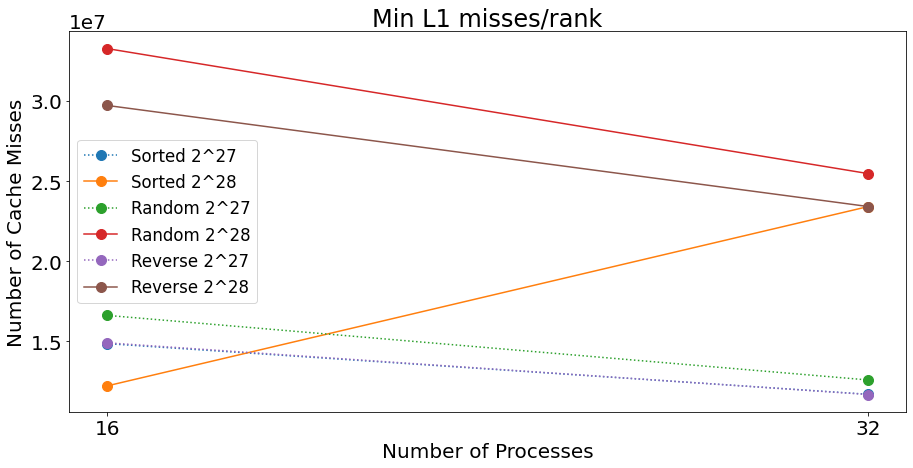

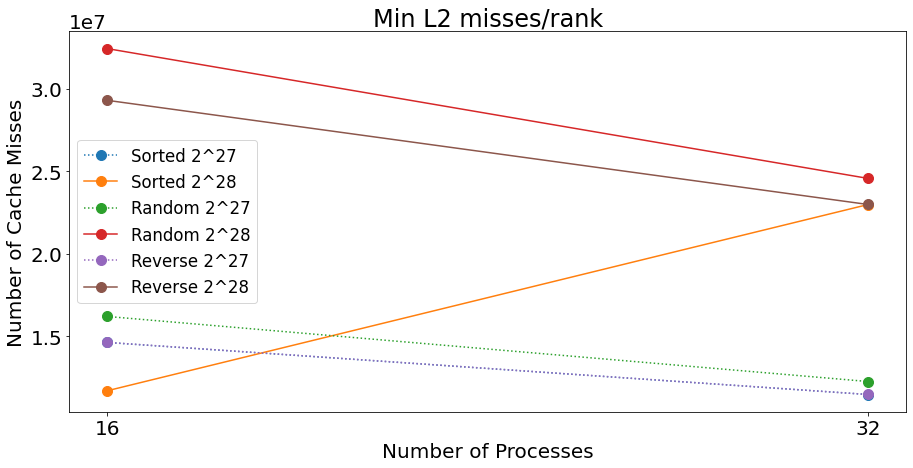

In [99]:
# # print(tk.dataframe.loc[node, "Min time/rank"].unstack(level=["input_size", "input_type"])[size])

# Example of how to call plot_mpl with different line styles
for node in tk.graph.traverse():
    if "main" not in node.frame['name']:
        continue

    name = node.frame['name']
    dfs = []
    legend = []
    
    for cache in ["Min L1 misses/rank", "Min L2 misses/rank"]:
        dfs = []
        legend = []
        
        # Define line styles for different powers of 2
        line_styles = []
        
        for input_type in input_types:
            for exp in exps:
                size = int(2**exp)
                dfs.append(tk.dataframe.loc[node, cache].unstack(level=["array_size", "array_type"])[size][input_type])
                legend.append(f"{input_type} 2^{exp}")
                
                # Assign specific line styles for 2^26 and 2^27
                if exp == 26:
                    line_styles.append("--")  # Dashed line for 2^26
                elif exp == 27:
                    line_styles.append(":")   # Dotted line for 2^27
                else:
                    line_styles.append("-")   # Solid line for other exponents
            
        markers = ["o"] * len(dfs)
        plot_mpl(
            dfs,
            f"{cache}",
            "Number of Processes",
            "Number of Cache Misses",
            legend,
            markers,
            line_styles=line_styles,
            save=save
        )

        


In [100]:
ljusts = [20, 10, 25, 0]

for node in tk.graph.traverse():
#     if node.frame['name'] == 'main' or "MPI" in node.frame['name']:
#     if node.frame['name'] not in plots:
    if "main" not in node.frame['name']:
        continue
    
    name = node.frame['name']
    if "data_init_X" in name:
        name = 'data_init_runtime'
    
    for cache in ["Min L1 misses/rank", "Min L2 misses/rank"]:
        rows = []
        for input_type in input_types:
            for numProcs in [16, 32]:
                row = []
                row.append(input_type)
                row.append(numProcs)
                for exp in exps:
                    size = int(2**exp)
                    row.append(tk.dataframe.loc[node, cache].unstack(level=["array_size", "array_type"])[size][input_type][numProcs])
#                     row.append(tk.dataframe.loc[node, "Total L2 misses"].unstack(level=["input_size", "input_type"])[size][input_type][numProcs])

                rows.append(row)
             
    
        print(f"{cache}")
        print("---------------------------------------")
        print("Input Type       Processes    2^27 Cache Misses        2^28 Cache Misses")
        for row in rows:
            printRow = ""
            for i in range(len(row)):
                printRow += str(row[i]).ljust(ljusts[i])
            print(printRow)
        print()
            

Min L1 misses/rank
---------------------------------------
Input Type       Processes    2^27 Cache Misses        2^28 Cache Misses
Sorted              16        14862279.0               12225804.0
Sorted              32        11703103.0               23414317.0
Random              16        16626844.0               33275611.0
Random              32        12596266.0               25475588.0
Reverse             16        14915010.0               29727268.0
Reverse             32        11688763.0               23420305.0

Min L2 misses/rank
---------------------------------------
Input Type       Processes    2^27 Cache Misses        2^28 Cache Misses
Sorted              16        14622101.0               11695243.0
Sorted              32        11470369.0               22979530.0
Random              16        16199588.0               32428675.0
Random              32        12256624.0               24562530.0
Reverse             16        14629582.0               29294334.0
Reverse  